In [1]:
#Basic notebook to import data and create baselines for the project proposal 
#(import code and utility functions from Kaggle kernel)

In [2]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def guess_image_dim(in_shape):
    side_len = int(np.sqrt(in_shape))
    if np.abs(in_shape-side_len*side_len)<2:
        return (int(side_len), int(side_len))
    else:
        side_len = int(np.sqrt(in_shape/3))
        return (side_len, side_len, 3)

csv_dir = os.path.join('..', 'data') 

In [3]:
all_files = sorted(glob(os.path.join(csv_dir, '*mnist*.csv')), 
                   key=lambda x: os.stat(x).st_size)[:5]
all_df_dict = {os.path.splitext(os.path.basename(x))[0]: pd.read_csv(x) for x in all_files}
for c_key in all_df_dict.keys():
    print(c_key, 'vector length:',  all_df_dict[c_key].shape[1], '->', guess_image_dim(all_df_dict[c_key].shape[1]))

hmnist_28_28_RGB vector length: 2353 -> (28, 28, 3)


In [4]:
from sklearn.model_selection import train_test_split
sample_id_count = list(all_df_dict.values())[0].shape[0]
train_ids, test_ids = train_test_split(range(sample_id_count), 
                                       test_size=0.20, 
                                       random_state=2018)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_models(in_model_maker):
    #fig, c_ax = plt.plot(figsize = (25, 5))
    for c_key in all_df_dict.keys():
        c_df = all_df_dict[c_key].copy()
        c_label = c_df.pop('label')
        c_model = in_model_maker()
        c_model.fit(c_df.iloc[train_ids, :], c_label.iloc[train_ids])
        c_pred = c_model.predict(c_df.iloc[test_ids, :])
        fig = sns.heatmap(confusion_matrix(c_label.iloc[test_ids], c_pred), 
                    annot=True, cbar=False, fmt='d', square=True)
        fig.set_title(f'Accuracy: {accuracy_score(c_label[test_ids], c_pred)*100:2.2f}%\n{c_key}')

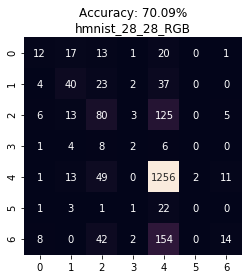

In [14]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_models(lambda : KNeighborsClassifier(n_jobs=5))

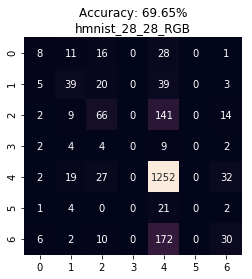

In [15]:
from sklearn.linear_model import LogisticRegression
evaluate_models(lambda : LogisticRegression(n_jobs=6, random_state=0, solver='lbfgs',
                                            multi_class='multinomial'))

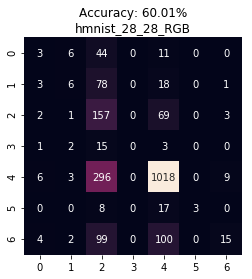

In [16]:
from sklearn.svm import LinearSVC
evaluate_models(lambda : LinearSVC(random_state=0))